In [1]:
import sys 
sys.path.append('..')

from lib.projection_exploration.projection_explorer import ProjectionExplorer
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(1)
%matplotlib inline

In [2]:
df = pd.read_csv('../data/titanic.csv')
df = (df.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)
        .dropna(axis=0)
        .astype({'Pclass': object, 'Age': np.int32, 'Fare': np.float32}))
df.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,22,7.250000,S
1,1,female,38,71.283302,C
2,3,female,26,7.925000,S
3,1,female,35,53.099998,S
4,3,male,35,8.050000,S


In [3]:
tsne = TSNE()
dbscan = DBSCAN(eps=1.0)
scaler = StandardScaler()

[-11.27066517  16.16197968]
[ -2.21209955 -23.25237274]
[ 34.65650558   3.34316492]
[ 17.2515049  -21.51766014]
[ 22.12506676 -36.92429352]
[ -9.42359924 -15.25498295]
[-31.856493   -15.70850372]
[  4.91629791  45.2431488 ]
[ 14.83114624   1.83598018]
[ -5.29702568 -31.6193676 ]
[ -5.06510782 -12.5958128 ]
[-9.03262901 -8.20222473]
[-11.64346123 -12.6581583 ]
[ 13.3777914    2.51495576]


(<matplotlib.figure.Figure at 0x2c90080b4e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2c9008019e8>)

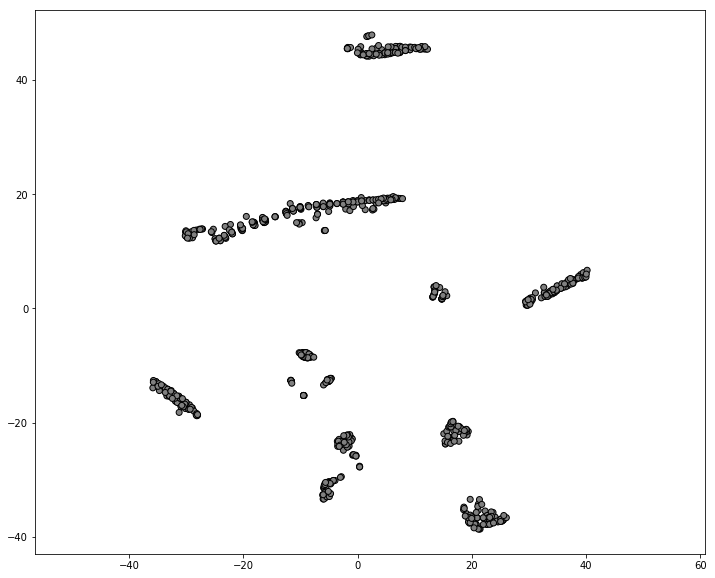

In [8]:
X = scaler.fit_transform(pd.get_dummies(df).values.astype(np.float32))
X_em = tsne.fit_transform(X)
clusters = dbscan.fit_predict(X)

proj_explorer = ProjectionExplorer()
proj_explorer.fit(df, X_em, clusters)
proj_explorer.plot_static()